## Importing libraries

In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [2]:
crop = pd.read_csv("Crop_recommendation.csv")

In [3]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


Sure, let's break down the concepts of supervised learning, classification problems, and why the crop recommendation dataset is considered a supervised learning classification problem.

### **1. Supervised Learning:**

Supervised learning is a type of machine learning where the algorithm is trained on a labeled dataset. Labeled data means that the input data used for training includes both the input features and the corresponding correct output or "label." The goal of supervised learning is to learn a mapping from inputs to outputs so that the model can make predictions on new, unseen data.

There are two main types of supervised learning problems:

- **Classification:** The output variable (or label) is a category, i.e., it belongs to a specific class.
  
- **Regression:** The output variable is a real value, such as a number.

In both cases, the algorithm is provided with a dataset where the correct output is known, and it adjusts its parameters to minimize the difference between its predictions and the true outputs.

### **2. Classification Problems:**

Classification is a type of supervised learning where the goal is to predict the categorical class labels of new instances, based on past observations. The output variable is discrete and represents different classes or categories.

Common algorithms for classification include Decision Trees, Support Vector Machines, Logistic Regression, and Neural Networks.

### **Crop Recommendation Dataset as a Supervised Learning Classification Problem:**

In the context of the crop recommendation dataset:

- **Supervised Learning Aspect:**
  - **Labeled Data:** The dataset includes columns like 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', and 'label.' Here, 'label' represents the type of crop, and the other columns are features.
  - **Training Phase:** During the training phase, the algorithm learns patterns from historical data where the correct crop type is known.

- **Classification Aspect:**
  - **Categorical Label:** The 'label' column contains categorical data, representing different crop types (e.g., rice, wheat).
  - **Objective:** The goal is to build a model that, given the environmental and soil conditions ('N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'), can predict the category or class of the crop.

So, the crop recommendation dataset is considered a supervised learning problem because it involves learning a mapping from input features to a labeled output. Specifically, it is a classification problem because the output variable ('label') is categorical, representing different classes of crops.

# Exploring data

In [5]:
crop.size

17600

In [6]:
crop.shape

(2200, 8)

In [7]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [8]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [9]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In the output you provided, the dtype='object' specifies the data type of the elements in the Index object returned by crop.columns. Let's break down the meaning of this dtype parameter:

Index: crop.columns returns an Index object, which represents the column labels or names of the DataFrame crop.

dtype='object': The dtype parameter indicates the data type of the elements in the Index. In this case, it is specified as 'object'.

'object' in pandas: This data type is used for columns with mixed types or for text data. When you see dtype='object' in the context of column labels, it generally means that the labels are strings or a combination of different types.

In [10]:
crop.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [11]:
crop['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [12]:
crop.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<AxesSubplot:>

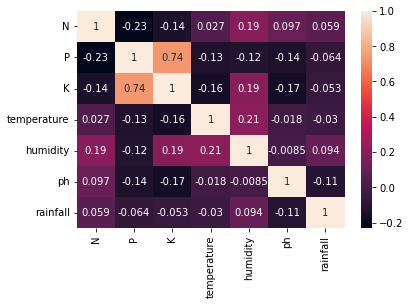

In [13]:
sns.heatmap(crop.corr(),annot=True)

A correlation matrix is a table that shows the correlation coefficients between many variables. Each cell in the table represents the correlation between two variables. The correlation coefficient is a statistical measure of the strength and direction of a linear relationship between two variables. It ranges from -1 to 1, where:

- **1:** Perfect positive correlation (as one variable increases, the other also increases).
- **0:** No correlation.
- **-1:** Perfect negative correlation (as one variable increases, the other decreases).

Here's how to interpret the correlation matrix:

- **Diagonal:**
  - All diagonal values are 1 because a variable has a perfect correlation with itself.

- **Off-Diagonal Elements:**
  - The off-diagonal elements show the correlation between pairs of variables. 

- **Interpretation:**
  - Positive values indicate a positive correlation (as one variable increases, the other tends to increase).
  - Negative values indicate a negative correlation (as one variable increases, the other tends to decrease).
  - The closer the value is to 1 or -1, the stronger the correlation. Values close to 0 indicate a weak correlation.

In [14]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [15]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [16]:
crop.duplicated().sum()

0

In [17]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


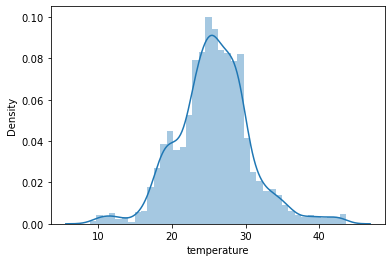

In [18]:
sns.distplot(crop['temperature'])
plt.show()

## Encoding
 To convert categorical value into numerical value because Machine cannot understand it

In [19]:

from sklearn.preprocessing import LabelEncoder

# Assuming 'crop' is your DataFrame and 'label' is the column to be encoded
label_encoder = LabelEncoder()

# Fit and transform the 'label' column
crop['label_encoded'] = label_encoder.fit_transform(crop['label']) + 1

# Manually create the dictionary with the desired order
crop_dict = dict(zip(label_encoder.classes_, range(1, len(label_encoder.classes_) + 1)))

# Display the mapping
print(crop_dict)


{'apple': 1, 'banana': 2, 'blackgram': 3, 'chickpea': 4, 'coconut': 5, 'coffee': 6, 'cotton': 7, 'grapes': 8, 'jute': 9, 'kidneybeans': 10, 'lentil': 11, 'maize': 12, 'mango': 13, 'mothbeans': 14, 'mungbean': 15, 'muskmelon': 16, 'orange': 17, 'papaya': 18, 'pigeonpeas': 19, 'pomegranate': 20, 'rice': 21, 'watermelon': 22}


In [20]:
crop['lable_nos.']=crop['label'].map(crop_dict)

In [21]:
crop.drop('lable_nos.', axis=1, inplace=True)

In [27]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label_encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,21
1,85,58,41,21.770462,80.319644,7.038096,226.655537,21
2,60,55,44,23.004459,82.320763,7.840207,263.964248,21
3,74,35,40,26.491096,80.158363,6.980401,242.864034,21
4,78,42,42,20.130175,81.604873,7.628473,262.717340,21


In [23]:
crop['label_encoded'].value_counts()

21    100
12    100
9     100
7     100
5     100
18    100
17    100
1     100
16    100
22    100
8     100
13    100
2     100
20    100
11    100
3     100
15    100
14    100
19    100
10    100
4     100
6     100
Name: label_encoded, dtype: int64

In [24]:
crop.drop('label', axis=1, inplace=True)

In [28]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label_encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,21
1,85,58,41,21.770462,80.319644,7.038096,226.655537,21
2,60,55,44,23.004459,82.320763,7.840207,263.964248,21
3,74,35,40,26.491096,80.158363,6.980401,242.864034,21
4,78,42,42,20.130175,81.604873,7.628473,262.717340,21


In [90]:
features=crop.drop(['label_encoded'],axis=1)
target=crop['label_encoded']

In [91]:
features

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [31]:
target

0       21
1       21
2       21
3       21
4       21
        ..
2195     6
2196     6
2197     6
2198     6
2199     6
Name: label_encoded, Length: 2200, dtype: int32

In [32]:
features.shape

(2200, 7)

In [33]:
target.shape

(2200,)

# Train test split

`train_test_split` is a function in the `scikit-learn` library (specifically in the `model_selection` module) that is commonly used for splitting a dataset into training and testing sets. This is a crucial step in machine learning model development to evaluate the performance of the model on unseen data. The function randomly divides the dataset into two parts based on a specified ratio.

In [34]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [37]:
features_train.shape

(1760, 7)

In [38]:
features_test.shape

(440, 7)

In [39]:
features_train

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


In [40]:
target_train

1656    17
752      3
892     11
1041     2
1179    13
        ..
1638    17
1095     2
1130    13
1294     8
860     11
Name: label_encoded, Length: 1760, dtype: int32

In [41]:
features_test

,N,P,K,temperature,humidity,ph,rainfall
1451,101,17,47,29.494014,94.729813,6.185053,26.308209
1334,98,8,51,26.179346,86.522581,6.259336,49.430510
1761,59,62,49,43.360515,93.351916,6.941497,114.778071
1735,44,60,55,34.280461,90.555616,6.825371,98.540477
1576,30,137,200,22.914300,90.704756,5.603413,118.604465
...,...,...,...,...,...,...,...
59,99,55,35,21.723831,80.238990,6.501698,277.962619
71,67,45,38,22.727910,82.170688,7.300411,260.887506
1908,121,47,16,23.605640,79.295731,7.723240,72.498009
1958,116,52,19,22.942767,75.371706,6.114526,67.080226


In [42]:
target_test

1451    16
1334    22
1761    18
1735    18
1576     1
        ..
59      21
71      21
1908     7
1958     7
482     19
Name: label_encoded, Length: 440, dtype: int32

# Scaling features using MinMaxScaler

Scaling and standardization are preprocessing techniques used in machine learning to normalize the features of a dataset. Let's discuss each concept:

### Scaling:

**Scaling** involves transforming the values of features to a specific range. The purpose is to ensure that all features have similar magnitudes, preventing one feature from dominating others. 
**MinMaxScaler** is one of the scaling techniques. It scales the features to a specified range, often between 0 and 1. The transformation is given by the formula:

X_scaled = (X - X_min)/(X_max-X_min)

In [43]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

features_train = ms.fit_transform(features_train)
features_test = ms.transform(features_test)

1. **Fit Phase (Training Set):**
   - During the `fit_transform` call on the training features (`features_train`), the `MinMaxScaler` analyzes each feature's values in the training set and computes the minimum and maximum values for each feature.
   - These minimum and maximum values are then stored internally in the `MinMaxScaler` object.

2. **Transform Phase (Both Training and Testing Sets):**
   - When transforming the training features (`features_train`), the scaler applies the scaling transformation using the minimum and maximum values that were learned during the fit phase on the training set.
   - When transforming the testing features (`features_test`), the scaler also applies the same scaling transformation, using the minimum and maximum values learned from the training set.
 
 ### Scaling helps in :
 
 1. Algorithms that rely on optimization often converge faster when features are on a similar scale.
 2. Scaling can improve the interpretability of coefficients in linear models. Without scaling, the coefficients may not accurately represent the importance of each feature.
 3. When interpreting or visualizing feature importance, having features on a consistent scale makes it easier to compare their contributions.

In [44]:
features_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

## Standardization

**Standardization**:
Standardization (or z-score normalization) is another type of feature scaling. It transforms the features to have a mean of 0 and a standard deviation of 1. Standardization assumes that the data follows a Gaussian distribution.

The formula for standardization is:

X_standardized = (X - mean(X))/std(X)

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(features_train)
features_train = sc.transform(features_train)
features_test = sc.transform(features_test)

In [46]:
features_train

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

Standardizing a dataset is helpful for several reasons in the context of machine learning and statistical modeling:

1. **Feature Scaling:**
   - Standardization scales the features, ensuring that they have a mean of 0 and a standard deviation of 1. This brings all features to a similar scale, preventing features with larger magnitudes from dominating the learning process.

2. **Effect on Algorithms:**
   - Many machine learning algorithms, such as support vector machines, k-nearest neighbors, and neural networks, perform better when features are on a similar scale. Standardization helps these algorithms converge faster and often results in improved model performance.

3. **Statistical Assumptions:**
   - Some statistical methods and models assume that the data follows a normal distribution. Standardization can help fulfill this assumption, making the results more reliable.


# Using training model

***Because this is a classification problem, so for that we have a lot of algorithms to train them, we'll use all of them***

In [57]:
from sklearn.model_selection import cross_val_score

# Logistic regression

In [47]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(features_train,target_train)

predicted_values = LogReg.predict(features_test)

x = metrics.accuracy_score(target_test, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x*100)

print(classification_report(target_test,predicted_values))

Logistic Regression's Accuracy is:  96.36363636363636
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        21
           3       0.90      0.95      0.93        20
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        27
           6       0.94      1.00      0.97        17
           7       0.94      1.00      0.97        17
           8       1.00      1.00      1.00        14
           9       0.83      0.87      0.85        23
          10       0.95      0.95      0.95        20
          11       0.85      1.00      0.92        11
          12       1.00      0.95      0.98        21
          13       1.00      1.00      1.00        19
          14       1.00      0.92      0.96        24
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00        17
          17       1.00    

In [76]:
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

# Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(features_train,target_train)

predicted_values = DecisionTree.predict(features_test)
x = metrics.accuracy_score(target_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(target_test,predicted_values))

DecisionTrees's Accuracy is:  86.5909090909091
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        21
           3       0.61      1.00      0.75        20
           4       1.00      0.96      0.98        26
           5       0.96      0.96      0.96        27
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        17
           8       1.00      1.00      1.00        14
           9       0.63      0.96      0.76        23
          10       0.00      0.00      0.00        20
          11       0.42      1.00      0.59        11
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        19
          14       0.00      0.00      0.00        24
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00        17
          17       1.00      1.00 

In [78]:
score = cross_val_score(DecisionTree,features,target,cv=5)
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

# Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(features_train,target_train)

predicted_values = RF.predict(features_test)

x = metrics.accuracy_score(target_test, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x*100)

print(classification_report(target_test,predicted_values))

RF's Accuracy is:  99.31818181818181
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        27
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        17
           8       1.00      1.00      1.00        14
           9       0.92      1.00      0.96        23
          10       1.00      1.00      1.00        20
          11       0.92      1.00      0.96        11
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        19
          14       1.00      0.96      0.98        24
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00        17
          17       1.00      1.00      1.00 

In [75]:
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

In [53]:
model

['Logistic Regression', 'Decision Tree', 'RF']

# Gaussian Naive Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(features_train,target_train)

predicted_values = NaiveBayes.predict(features_test)
x = metrics.accuracy_score(target_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x*100)

print(classification_report(target_test,predicted_values))

Naive Bayes's Accuracy is:  99.54545454545455
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        27
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        17
           8       1.00      1.00      1.00        14
           9       0.92      1.00      0.96        23
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        11
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00        17
          17       1.00      1.00  

In [58]:
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

# SVM

In [59]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

svm_model = SVC()

svm_model.fit(features_train, target_train)

predicted_values_svm = svm_model.predict(features_test)

accuracy_svm = metrics.accuracy_score(target_test, predicted_values_svm)

acc.append(accuracy_svm)
model.append('SVM')

print("SVM's Accuracy is:", accuracy_svm * 100)
print(classification_report(target_test, predicted_values_svm))

SVM's Accuracy is: 96.81818181818181
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        21
           3       1.00      0.95      0.97        20
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        27
           6       0.94      1.00      0.97        17
           7       0.94      1.00      0.97        17
           8       1.00      1.00      1.00        14
           9       0.78      0.91      0.84        23
          10       0.91      1.00      0.95        20
          11       0.79      1.00      0.88        11
          12       1.00      0.95      0.98        21
          13       1.00      1.00      1.00        19
          14       1.00      0.92      0.96        24
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00        17
          17       1.00      1.00      1.00 

In [61]:
score = cross_val_score(svm_model,features,target,cv=5)
score

array([0.98409091, 0.97954545, 0.97954545, 0.97272727, 0.975     ])

# KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

knn_model.fit(features_train, target_train)

predicted_values_knn = knn_model.predict(features_test)

accuracy_knn = metrics.accuracy_score(target_test, predicted_values_knn)

acc.append(accuracy_knn)
model.append('K-Nearest Neighbors')

print("K-Nearest Neighbors's Accuracy is:", accuracy_knn * 100)

print(classification_report(target_test, predicted_values_knn))

K-Nearest Neighbors's Accuracy is: 95.68181818181817
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        21
           3       0.95      0.95      0.95        20
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        27
           6       0.94      1.00      0.97        17
           7       0.89      1.00      0.94        17
           8       1.00      1.00      1.00        14
           9       0.81      0.96      0.88        23
          10       0.91      1.00      0.95        20
          11       0.69      1.00      0.81        11
          12       1.00      0.90      0.95        21
          13       0.90      1.00      0.95        19
          14       1.00      0.83      0.91        24
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00        17
          17       1.00     

In [66]:
score = cross_val_score(knn_model,features,target,cv=5)
score

array([0.97727273, 0.98181818, 0.97954545, 0.97954545, 0.97954545])

# Accuracy 

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

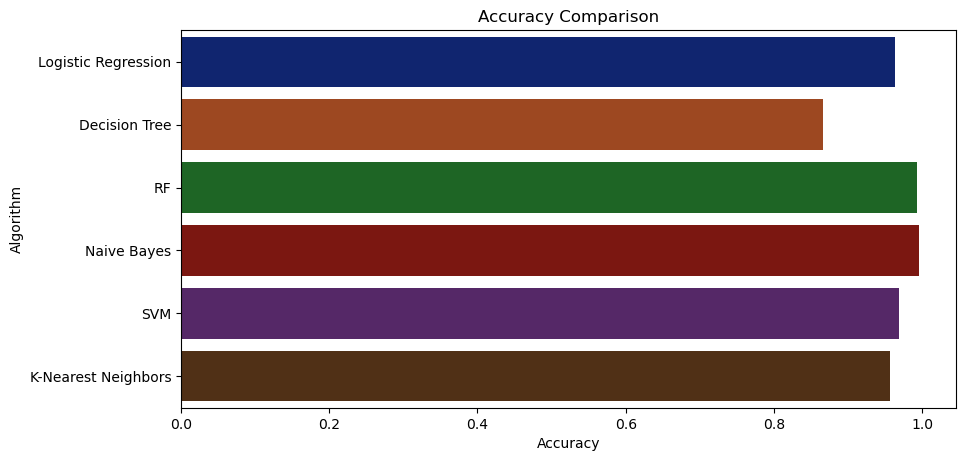

In [72]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

# Predictive System

In [92]:
def predictor(N,P,k,temperature,humidity,ph,rainfal):
    features_arr = np.array([[N,P,k,temperature,humidity,ph,rainfal]])
    transformed_features = ms.transform(features_arr)
    transformed_features = sc.transform(transformed_features)
    prediction = RF.predict(transformed_features)
    
    return prediction

In [99]:
N = 89
P = 56
k = 69
temperature = 45
humidity = 80
ph = 5.6
rainfall = 45

predict = predictor(N,P,k,temperature,humidity,ph,rainfall)
print("Prediction:", predict)

crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict[0] in crop_dict:
    res = crop_dict[predict[0]]
    print("{} is a best crop to be cultivated ".format(res))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

Prediction: [16]
Blackgram is a best crop to be cultivated 


In [81]:
crop_dict

{'apple': 1,
 'banana': 2,
 'blackgram': 3,
 'chickpea': 4,
 'coconut': 5,
 'coffee': 6,
 'cotton': 7,
 'grapes': 8,
 'jute': 9,
 'kidneybeans': 10,
 'lentil': 11,
 'maize': 12,
 'mango': 13,
 'mothbeans': 14,
 'mungbean': 15,
 'muskmelon': 16,
 'orange': 17,
 'papaya': 18,
 'pigeonpeas': 19,
 'pomegranate': 20,
 'rice': 21,
 'watermelon': 22}